In [351]:
import sys
sys.path.append("/Users/rq.aita/Códigos/scripts")
sys.path.append("/home/ufpr/Documentos/GitHub/scripts")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from scipy.linalg import lstsq
import hydroeval

import hydrology as hydro
import settings_plot

Os dados da Tabela 01 representam um evento de cheia observado em uma bacia de 100 km² e deverão ser utilizados na resolução da presente lista de os exercícios.

|  t |    P |   Q |
|----|------|-----|
|  1 |  4.0 |  11 |
|  2 |  6.1 |  60 |
|  3 | 15.3 | 140 |
|  4 |  7.3 | 178 |
|  5 |  2.8 | 182 |
|  6 |  2.0 | 180 |
|  7 |  1.0 | 164 |
|  8 |  1.0 | 142 |
|  9 |  0.4 | 116 |
| 10 |  0.4 |  90 |
| 11 |  0.0 |  68 |
| 12 |  0.0 |  52 |
| 13 |  0.0 |  40 |
| 14 |  0.0 |  32 |
| 15 |  0.0 |  26 |
| 16 |  0.0 |  22 |
| 17 |  0.0 |  20 |

In [55]:
tab_01 = pd.read_excel("files/l_04.xlsx", index_col="t")

tab_01

,P,Q
t,,
1,4.0,11
2,6.1,60
3,15.3,140
4,7.3,178
5,2.8,182
6,2.0,180
7,1.0,164
8,1.0,142
9,0.4,116


# Exercício 1

Efetue a separação dos escoamentos superficial e subterrâneo da cheia apresentada
na Tabela 01 pelos métodos de separação gráfica (métodos 01, 02 e 03) e compare os resultados
(hidrogramas de escoamento superficial, volumes escoado superficialmente e alturas efetivas). 

## Resolução

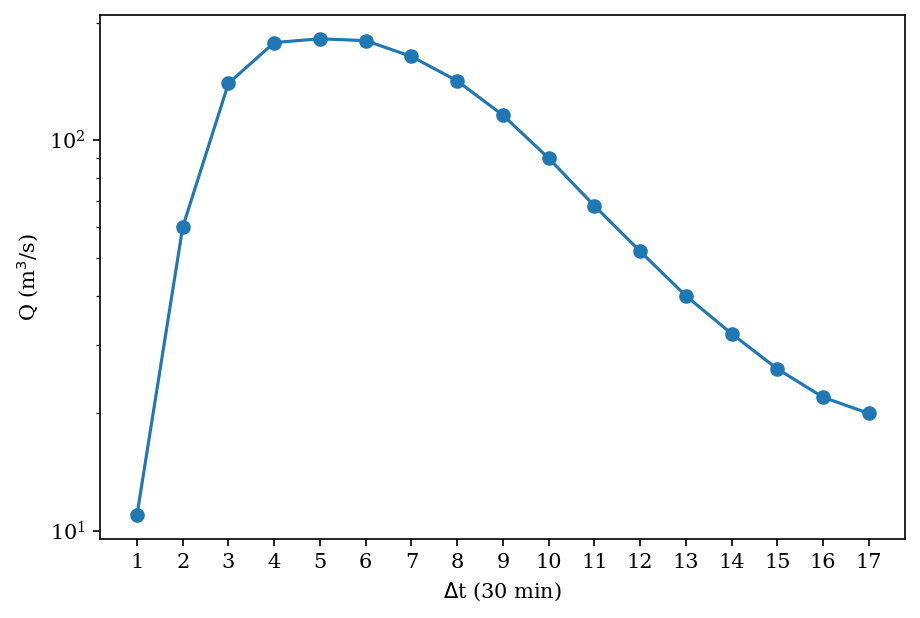

In [56]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(tab_01['Q'], marker='o')
ax.set_xlabel('$\Delta$t (30 min)')
ax.set_xticks(range(1,18))
ax.set_ylabel('Q (m$^3$/s)')
ax.set_yscale('log')
fig.savefig("figures/l_04_q.png", format='png', dpi=300)
plt.show()

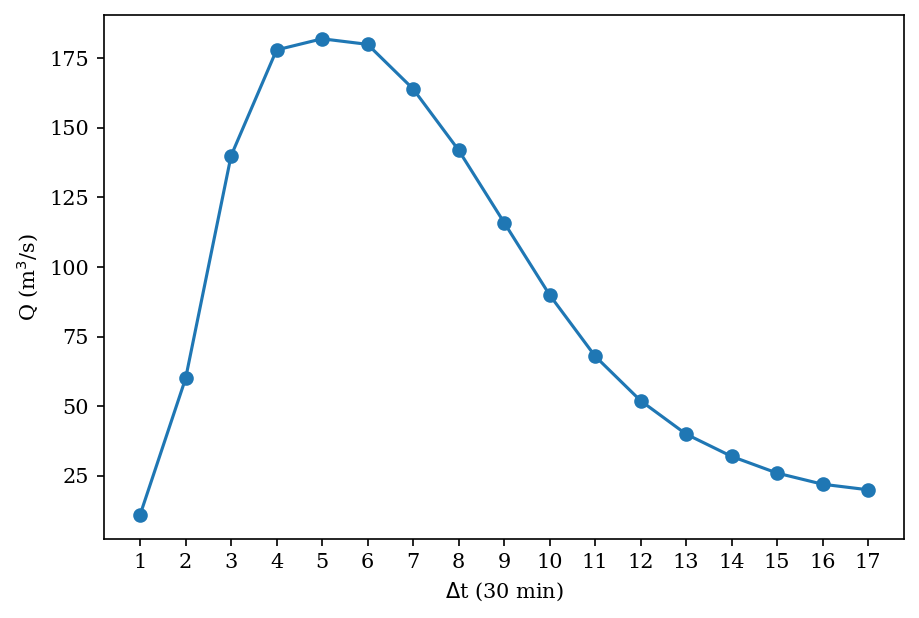

In [57]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(tab_01['Q'], marker='o')
ax.set_xlabel('$\Delta$t (30 min)')
ax.set_xticks(range(1,18))
ax.set_ylabel('Q (m$^3$/s)')
# ax.set_yscale('log')
fig.savefig("figures/l_04_q.png", format='png', dpi=300)
plt.show()

In [64]:
tp = 5  # tempo de pico

### Método 1

Cálculo de $k$

In [58]:
k = [0]

for i, q in enumerate(tab_01["Q"]):
    if i == 0:
        continue
    k.append(q / tab_01["Q"][i])

In [59]:
k = k[-1]

Seção C-B

In [69]:
tab_01["Q1"] = 0
tab_01.loc[17, "Q1"] = tab_01.loc[17, "Q"]

for i in range(16, 4, -1):
    tab_01.loc[i, "Q1"] = tab_01.loc[i+1, "Q1"] / k

Seção A-B

In [71]:
qb = tab_01.loc[5, "Q1"]

In [74]:
delta = (qb - tab_01.loc[1, "Q"]) / 4

In [75]:
tab_01.loc[1, "Q1"] = tab_01.loc[1, "Q"]

for i in range(2, 5):
    tab_01.loc[i, "Q1"] = tab_01.loc[i-1, "Q1"] + delta

### Método 2

Seção A-C

In [80]:
tab_01["Q2"] = 0
tab_01.loc[ 1, "Q2"] = tab_01.loc[ 1, "Q"]
tab_01.loc[17, "Q2"] = tab_01.loc[17, "Q"]

In [81]:
delta = (tab_01.loc[17, "Q"] - tab_01.loc[1, "Q"]) / 17

In [82]:
for i in range(2, 17):
    tab_01.loc[i, "Q2"] = tab_01.loc[i-1, "Q2"] + delta

### Método 3

Cálculo de $k$

Como não há pontos o suficiente antes da ascensão do hidrograma para o cálculo de $k$, adotou-se o mesmo que o considerado no Método 1.

Seção A-D

In [88]:
tab_01["Q3"] = 0
tab_01.loc[1, "Q3"] = tab_01.loc[1, "Q"]

for i in range(2, 6):
    tab_01.loc[i, "Q3"] = tab_01.loc[i-1, "Q3"] * k

Seção D-C

In [90]:
qd = tab_01.loc[5, "Q3"]

In [91]:
delta = (tab_01.loc[17, "Q"] - qd) / 12

In [92]:
# tab_01.loc[1, "Q3"] = tab_01.loc[1, "Q"]

for i in range(6, 18):
    tab_01.loc[i, "Q3"] = tab_01.loc[i-1, "Q3"] + delta

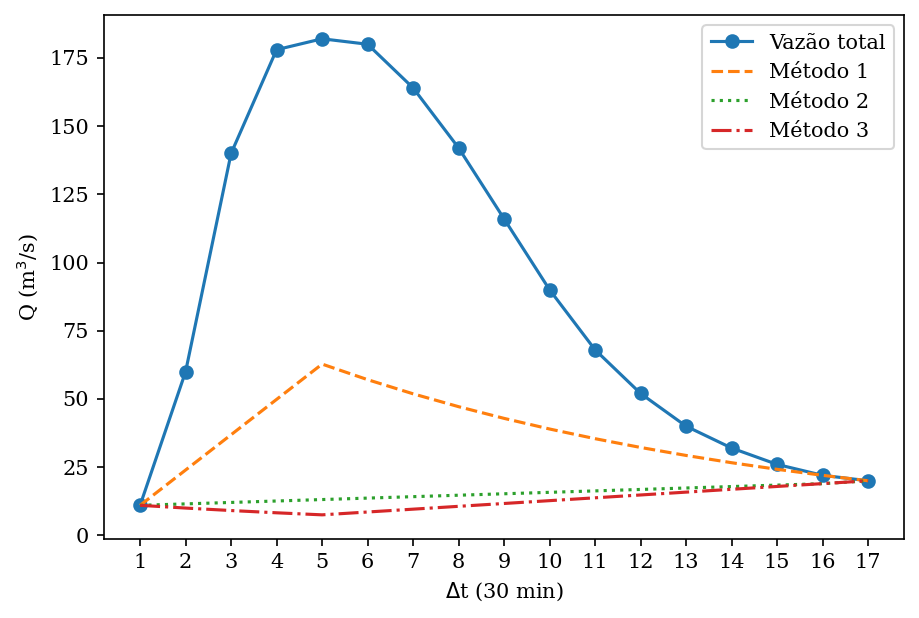

In [121]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(tab_01['Q'], marker='o', label='Vazão total')
ax.plot(tab_01['Q1'], '--', label='Método 1')
ax.plot(tab_01['Q2'], ':', label='Método 2')
ax.plot(tab_01['Q3'], '-.', label='Método 3')

ax.set_xlabel('$\Delta$t (30 min)')
ax.set_xticks(range(1,18))
ax.set_ylabel('Q (m$^3$/s)')
ax.legend()

fig.savefig("figures/l_04_01.png", format='png', dpi=300)
plt.show()

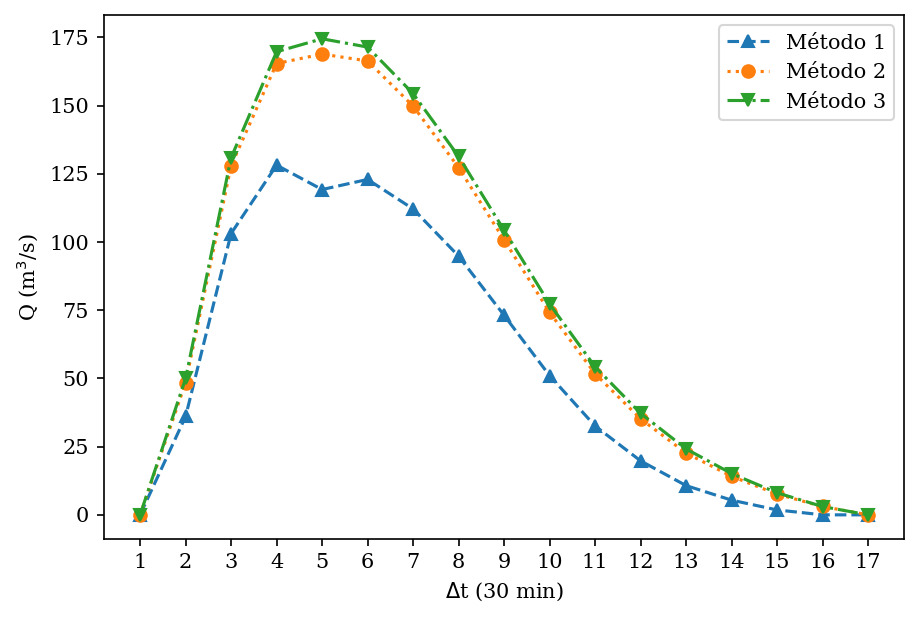

In [137]:
fig, ax = plt.subplots(constrained_layout=True)

# ax.plot(tab_01['Q'], marker='o', label='Vazão total')
ax.plot(tab_01['Q'] - tab_01['Q1'], '^--', label='Método 1')
ax.plot(tab_01['Q'] - tab_01['Q2'], 'o:', label='Método 2')
ax.plot(tab_01['Q'] - tab_01['Q3'], 'v-.', label='Método 3')

ax.set_xlabel('$\Delta$t (30 min)')
ax.set_xticks(range(1,18))
ax.set_ylabel('Q (m$^3$/s)')
ax.legend()

fig.savefig("figures/l_04_01_Qsup.png", format='png', dpi=300)
plt.show()

In [125]:
(tab_01['Q'].sum() - tab_01.sum()) * 30 * 60 / 1e+6

P     2.668860
Q     0.000000
Q1    1.639607
Q2    2.274247
Q3    2.350456
dtype: float64

In [128]:
(tab_01['Q'].sum() - tab_01.sum()) * 30 * 60 / (100 * 1e6) * 1000

P     26.688600
Q      0.000000
Q1    16.396072
Q2    22.742471
Q3    23.504565
dtype: float64

# Exercício 2

Supondo uma taxa de infiltração constante, calcule o índice de infiltração φ e o hietograma de chuva efetiva, considerando-se os dados da Tabela 01 e a separação do escoamento realizada no exercício 01

In [271]:
p = tab_01['P'].loc[1:10]
Pe = 23.504565
P = p.sum()
n = 10
I = P - Pe
print(P, n, I)

40.3 10 16.795434999999998


In [272]:
phi = I / n
phi

1.6795434999999999

In [273]:
P = p.sum() - sum(p[p < phi])
n = 10 - sum(p < phi)
I = P - Pe
print(P, n, I)

37.5 6 13.995435


In [274]:
phi = I / n
phi

2.3325725

In [275]:
P = p.sum() - sum(p[p < phi])
n = 10 - sum(p < phi)
I = P - Pe
print(P, n, I)

35.5 5 11.995435


In [276]:
phi = I / n
phi

2.399087

In [277]:
P = p.sum() - sum(p[p < phi])
n = 10 - sum(p < phi)
I = P - Pe
print(P, n, I)

35.5 5 11.995435


In [278]:
phi

2.399087

In [279]:
pe = p - phi

pe[pe < 0] = 0

In [280]:
pe

t
1      1.600913
2      3.700913
3     12.900913
4      4.900913
5      0.400913
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.000000
Name: P, dtype: float64

# Exercício 3

O sistema foi resolvido com o método dos mínimos quadrados, com o acréscimo da equação $\sum h_i = 1$

In [281]:
q_sup = tab_01['Q'] - tab_01['Q3']
q_sup = q_sup.loc[1:16].to_numpy()
q_sup = q_sup * (30 * 60) * (1e+9 / 100e12)

In [287]:
p = pe[:5]
Pe = np.zeros([16, 12])
hu = np.zeros([12])

for i in range(12):  # para cada coluna
    Pe[i:i+5,i] = p

In [290]:
pd.DataFrame(Pe)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.600913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3.700913,1.600913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,12.900913,3.700913,1.600913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4.900913,12.900913,3.700913,1.600913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.400913,4.900913,12.900913,3.700913,1.600913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.400913,4.900913,12.900913,3.700913,1.600913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.400913,4.900913,12.900913,3.700913,1.600913,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.400913,4.900913,12.900913,3.700913,1.600913,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.400913,4.900913,12.900913,3.700913,1.600913,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.400913,4.900913,12.900913,3.700913,1.600913,0.000000,0.000000


In [291]:
hu, res, rnk, s = lstsq(Pe, q_sup)

In [292]:
hu.sum()

0.9979238462571555

In [311]:
hydroeval.nse_c2m(Pe.dot(hu), q_sup)

0.9911508573954918

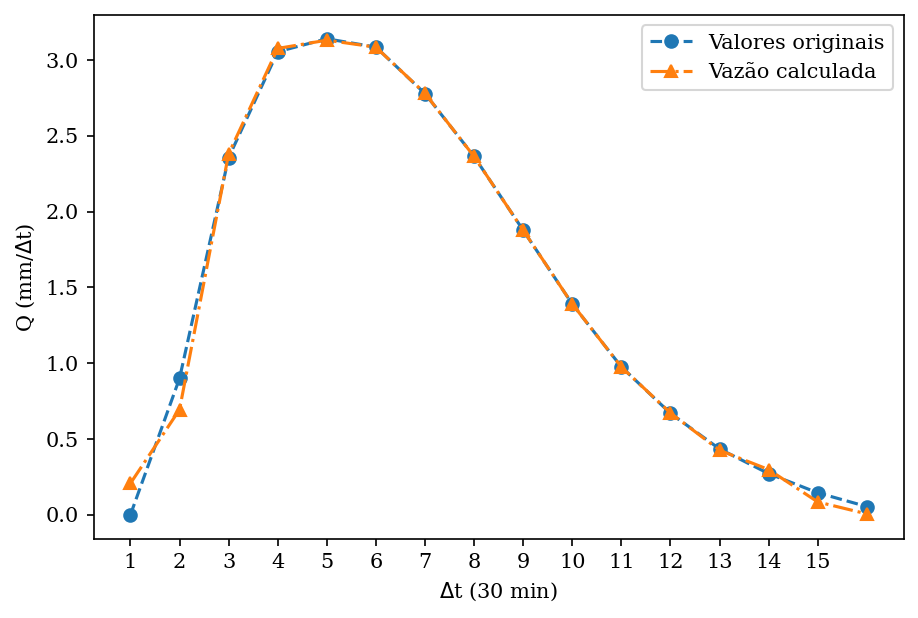

In [308]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(q_sup, 'o--', label='Valores originais')
ax.plot(Pe.dot(hu), '^-.', label='Vazão calculada')

ax.set_xlabel('$\Delta$t (30 min)')
ax.set_xticks(range(15))
ax.set_xticklabels(range(1,16))
ax.set_ylabel('Q (mm/$\Delta$t)')
ax.legend()

fig.savefig("figures/l_04_03_a.png", format='png', dpi=300)
plt.show()

In [312]:
p = np.array([0.5, 2.5, 8, 25, 20, 6])

In [313]:
pe = p - phi

pe[pe < 0] = 0

In [314]:
pe

array([ 0.      ,  0.100913,  5.600913, 22.600913, 17.600913,  3.600913])

In [316]:
p = pe
Pe = np.zeros([17, 12])

for i in range(12):  # para cada coluna
    Pe[i:i+6,i] = p

In [317]:
pd.DataFrame(Pe)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.100913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,5.600913,0.100913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,22.600913,5.600913,0.100913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,17.600913,22.600913,5.600913,0.100913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,3.600913,17.600913,22.600913,5.600913,0.100913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,3.600913,17.600913,22.600913,5.600913,0.100913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,3.600913,17.600913,22.600913,5.600913,0.100913,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,3.600913,17.600913,22.600913,5.600913,0.100913,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,3.600913,17.600913,22.600913,5.600913,0.100913,0.000000,0.000000,0.000000


In [326]:
pd.Series(Pe.dot(hu)).to_excel("hidrograma.xlsx")

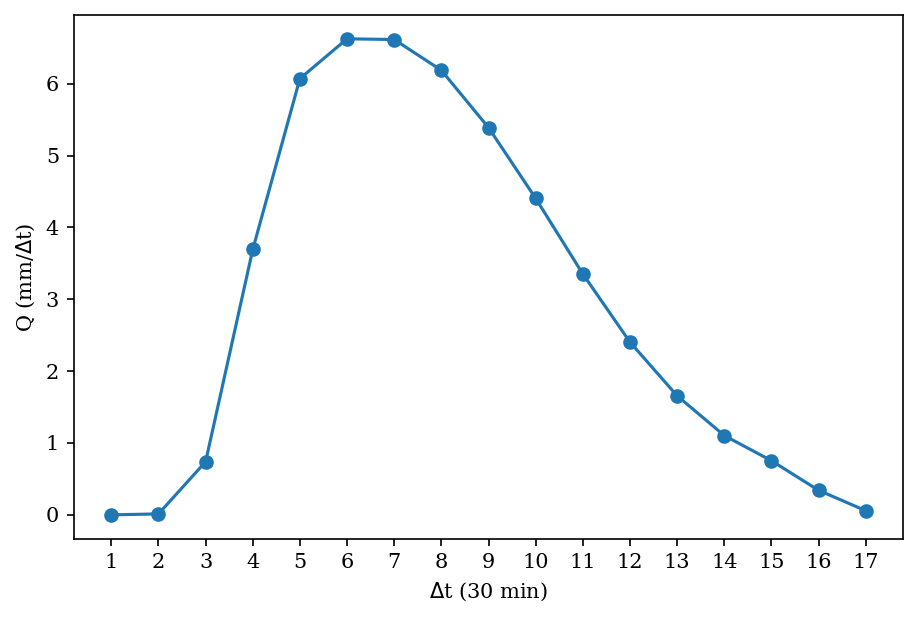

In [324]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(Pe.dot(hu), 'o-', label='Vazão calculada')

ax.set_xlabel('$\Delta$t (30 min)')
ax.set_xticks(range(17))
ax.set_xticklabels(range(1,18))
ax.set_ylabel('Q (mm/$\Delta$t)')
# ax.legend()

fig.savefig("figures/l_04_03_b.png", format='png', dpi=300)
plt.show()

# Exercício 4

In [337]:
hu_df = pd.DataFrame(hu)

In [338]:
hu_df.loc[12, 0] = 0

In [339]:
hu_df['def'] = 0

In [340]:
hu_df.loc[1:, 'def'] = hu

In [344]:
hu_df['soma'] = (hu_df['def'] + hu_df[0])/2

In [347]:
hu_df.to_excel('hu_def.xlsx')

# Exercício 5

Assumindo-se que o HUI da bacia do Ribeirão dos Meninos possa ser representado por
uma função do tipo µ(t) = α e-αt
, estabeleça o HU (tu = 30 min) para α = 1, 1/2 e 1/3. Compare os
HUs obtidos nos exercícios 03 e 05. (Usar o coeficiente de Nash-Sutcliffe para a comparação). 

In [348]:
u = lambda t, a : np.exp(-a*t) * a

In [360]:
t = np.arange(0.1, 15, 1)  # zero excluso por instabilidade numérica

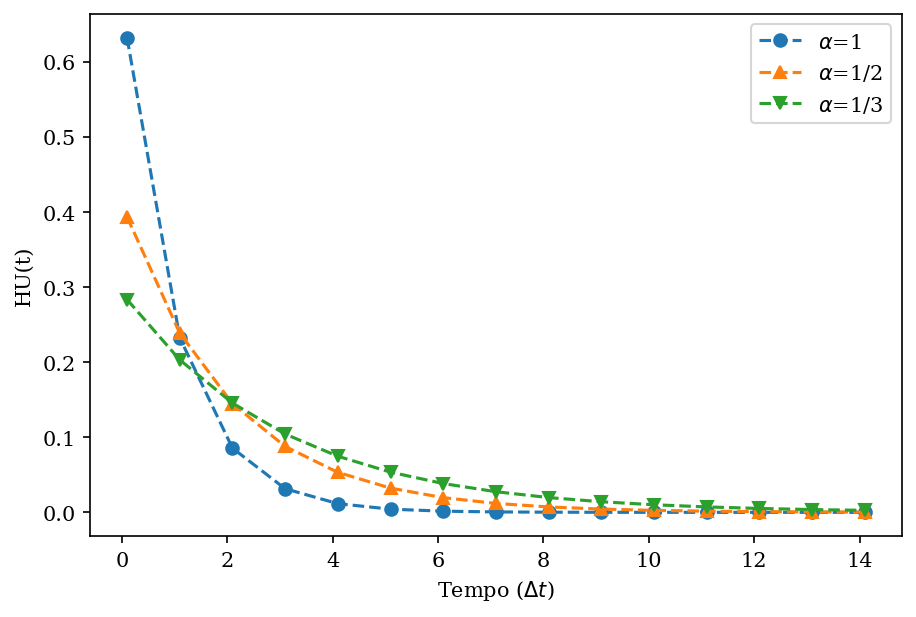

In [378]:
a_tentativas = [1, 1/2, 1/3]
hui1 = [0] * len(t)
hui2 = [0] * len(t)
hui3 = [0] * len(t)

fig, ax = plt.subplots(constrained_layout=True)

for i in range(len(t)):
    hui1[i] = u(t[i], a_tentativas[0])
    hui2[i] = u(t[i], a_tentativas[1])
    hui3[i] = u(t[i], a_tentativas[2])
ax.plot(t, huA1, 'o--', label=r'$\alpha$=1')
ax.plot(t, huA2, '^--', label=r'$\alpha$=1/2')
ax.plot(t, huA3, 'v--', label=r'$\alpha$=1/3')
    
ax.set_xlabel("Tempo ($\Delta t$)")
ax.set_ylabel("HU(t)")
plt.savefig("l_04_05.png", format="png", dpi=300)
ax.legend()
plt.show()

In [374]:
huA1 = [np.exp(-i * 1) - np.exp(-(i+1) * 1) for i in range(15)]

In [375]:
huA2 = [np.exp(-i * 1/2) - np.exp(-(i+1) * 1/2) for i in range(15)]

In [376]:
huA3 = [np.exp(-i * 1/3) - np.exp(-(i+1) * 1/3) for i in range(15)]